In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#importing data
train = pd.read_csv('energy_train.csv')
test = pd.read_csv('energy_test.csv')

#spliting in train and target
target = train['WattHour']
train = train.drop(['WattHour'], axis = 1)

In [0]:
#preproceesing
dataset = pd.concat([train, test], axis = 0, ignore_index = True)
dataset.describe()
dataset.info()

missing_value_col  =['degree_C1', 'degree_C3', 'moisture_9']

for col in missing_value_col:
    dataset[col].fillna(method = 'ffill', inplace = True)

dataset.isna().sum()

hour = dataset['date'].str.split(':').str[0]
hour = hour.str.split(' ').str[-1]

dataset['hour'] = hour.astype(int)

dataset = dataset.drop(['date'], axis = 1)

dataset = dataset.drop(['id'], axis = 1)

train = dataset.iloc[:15000, :]
test = dataset.iloc[15000:, :]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19375 entries, 0 to 19374
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19375 non-null  int64  
 1   date               19375 non-null  object 
 2   luminousity        19375 non-null  int64  
 3   degree_C1          15457 non-null  float64
 4   moisture_1         19375 non-null  float64
 5   degree_C2          19375 non-null  float64
 6   moisture_2         19375 non-null  float64
 7   degree_C3          17067 non-null  float64
 8   moisture_3         19375 non-null  float64
 9   degree_C4          19375 non-null  float64
 10  moisture_4         19375 non-null  float64
 11  degree_C5          19375 non-null  float64
 12  moisture_5         19375 non-null  float64
 13  degree_C6          19375 non-null  float64
 14  moisture_6         19375 non-null  float64
 15  degree_C7          19375 non-null  float64
 16  moisture_7         193

In [0]:
col_to_remove = ['random_variable_1', 'random_variable_2', 'Clarity',
                  'degree_C3','moisture_3',
                  'degree_C8','moisture_8',
                 'degree_C6','moisture_6','degree_Cout',
                 ] 

train = train.drop(col_to_remove, axis =1)
test = test.drop(col_to_remove, axis =1)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 0)

from xgboost import XGBClassifier
xg = XGBClassifier( booster = 'dart', **{'eval_metric': 'rmse'})
xg.fit(train, target, verbose = False)

y_pred = xg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

87.31475629392014


In [0]:
y_pred = xg.predict(test)

In [0]:
y_pred = ((y_pred+5)//10) *10
from collections import Counter
Counter(y_pred)

Counter({40: 28,
         50: 1134,
         60: 1956,
         70: 320,
         80: 127,
         90: 331,
         100: 178,
         110: 94,
         120: 156,
         130: 10,
         140: 1,
         190: 1,
         260: 6,
         340: 32,
         580: 1})

In [0]:
y = pd.DataFrame(y_pred)
y.to_csv('xg_classifier.csv')

In [0]:
train = pd.read_csv('energy_train.csv')
test = pd.read_csv('energy_test.csv')

#spliting in train and target
train = train[train['WattHour'] < 450]


target = train['WattHour']
train = train.drop(['WattHour'], axis = 1)

#preproceesing
dataset = pd.concat([train, test], axis = 0, ignore_index = True)
dataset.describe()
dataset.info()

missing_value_col  =['degree_C1', 'degree_C3', 'moisture_9']

for col in missing_value_col:
    dataset[col].fillna(method = 'ffill', inplace = True)

dataset.isna().sum()

hour = dataset['date'].str.split(':').str[0]
hour = hour.str.split(' ').str[-1]

dataset['hour'] = hour.astype(int)

dataset = dataset.drop(['date'], axis = 1)

dataset = dataset.drop(['id'], axis = 1)

train = dataset.iloc[:14673, :]
test = dataset.iloc[14673:, :]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19048 entries, 0 to 19047
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19048 non-null  int64  
 1   date               19048 non-null  object 
 2   luminousity        19048 non-null  int64  
 3   degree_C1          15205 non-null  float64
 4   moisture_1         19048 non-null  float64
 5   degree_C2          19048 non-null  float64
 6   moisture_2         19048 non-null  float64
 7   degree_C3          16799 non-null  float64
 8   moisture_3         19048 non-null  float64
 9   degree_C4          19048 non-null  float64
 10  moisture_4         19048 non-null  float64
 11  degree_C5          19048 non-null  float64
 12  moisture_5         19048 non-null  float64
 13  degree_C6          19048 non-null  float64
 14  moisture_6         19048 non-null  float64
 15  degree_C7          19048 non-null  float64
 16  moisture_7         190

In [0]:
col_to_remove = [ 'random_variable_1','random_variable_2', 'Clarity',
                  'degree_C3','moisture_3',
                  'degree_C8','moisture_8',
                 'degree_C6','moisture_6','degree_Cout',
                 ] 

train = train.drop(col_to_remove, axis =1)
test = test.drop(col_to_remove, axis =1)


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 0)

In [0]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(train, target)

TypeError: ignored

In [0]:
y_cbc = cbc.predict(test)

In [0]:
cbc.feature_importances_

array([ 4.78901133,  4.27308398,  5.27783288,  4.73612057,  5.17743137,
        6.12462714,  3.10757308,  4.23917269,  7.15163576,  3.61944658,
        4.1203105 ,  2.677755  ,  5.8280619 ,  5.54297088,  7.94691245,
        6.76597267,  5.35486171, 13.26721951])

In [0]:
y = pd.DataFrame(y_cbc)
y.to_csv('cbc.csv')

In [0]:
help(CatBoostClassifier)

In [0]:
train = pd.read_csv('energy_train.csv')
test = pd.read_csv('energy_test.csv')

#spliting in train and target
train = train[train['WattHour'] < 400]


target = train['WattHour']
train = train.drop(['WattHour'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18901 entries, 0 to 18900
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18901 non-null  int64  
 1   date               18901 non-null  object 
 2   luminousity        18901 non-null  int64  
 3   degree_C1          15096 non-null  float64
 4   moisture_1         18901 non-null  float64
 5   degree_C2          18901 non-null  float64
 6   moisture_2         18901 non-null  float64
 7   degree_C3          16680 non-null  float64
 8   moisture_3         18901 non-null  float64
 9   degree_C4          18901 non-null  float64
 10  moisture_4         18901 non-null  float64
 11  degree_C5          18901 non-null  float64
 12  moisture_5         18901 non-null  float64
 13  degree_C6          18901 non-null  float64
 14  moisture_6         18901 non-null  float64
 15  degree_C7          18901 non-null  float64
 16  moisture_7         189

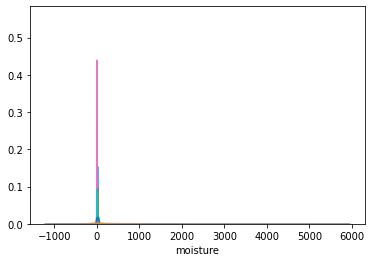

In [0]:
#preproceesing
dataset = pd.concat([train, test], axis = 0, ignore_index = True)
dataset.describe()
dataset.info()


missing_value_col  =['degree_C1', 'degree_C3', 'moisture_9']

for col in missing_value_col:
    dataset[col].fillna(method = 'ffill', inplace = True)

dataset.isna().sum()

hour = dataset['date'].str.split(':').str[0]
hour = hour.str.split(' ').str[-1]

dataset['hour'] = hour.astype(int)

sns.distplot(dataset['luminousity'])

dataset['degree_C1'] = dataset['degree_C1'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C1'])

dataset['degree_C2'] = dataset['degree_C2'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C2'])

dataset['degree_C3'] = dataset['degree_C3'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C3'])

dataset['degree_C4'] = dataset['degree_C4'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C4'])

dataset['degree_C5'] = dataset['degree_C5'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C5'])

dataset['degree_C6'] = dataset['degree_C6'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C6'])

dataset['degree_C7'] = dataset['degree_C7'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C7'])

dataset['degree_C8'] = dataset['degree_C8'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C8'])

dataset['degree_C9'] = dataset['degree_C9'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C9'])



dataset['moisture_6'] =  dataset['moisture_out'] - dataset['moisture_6'] 
sns.distplot(dataset['moisture_6'])

dataset['moisture'] = dataset['moisture_6']*dataset['dew_index']*dataset['Wind']
sns.distplot(dataset['moisture'])

dataset = dataset.drop(['date'], axis = 1)

dataset = dataset.drop(['id'], axis = 1)


train = dataset.iloc[:14526, :]
test = dataset.iloc[14526:, :]

In [0]:
col_to_remove = [ 'random_variable_1','random_variable_2', 'Clarity',
                 ] 

train = train.drop(col_to_remove, axis =1)
test = test.drop(col_to_remove, axis =1)

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 0)


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 3)
X_train_lda = lda.fit(train, target).transform(train)
X_test_lda = lda.transform(test)

In [0]:
lda.explained_variance_ratio_

array([0.65596102, 0.13536892, 0.08647369])

In [0]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations = 9999)
cb.fit(X_train_lda,y_train, verbose = 500)
y_cb = cb.predict(X_test)
y_cb = ((y_cb+5)//10) *10
Counter(y_cb)
#cb.feature_importances_


Learning rate set to 0.012814
0:	learn: 3.6134603	total: 139ms	remaining: 23m 9s
500:	learn: 2.2859395	total: 39.3s	remaining: 12m 24s
1000:	learn: 2.1972606	total: 1m 18s	remaining: 11m 45s
1500:	learn: 2.1349313	total: 1m 57s	remaining: 11m 5s
2000:	learn: 2.0800122	total: 2m 36s	remaining: 10m 25s
2500:	learn: 2.0300644	total: 3m 15s	remaining: 9m 47s
3000:	learn: 1.9851223	total: 3m 55s	remaining: 9m 8s
3500:	learn: 1.9439789	total: 4m 34s	remaining: 8m 29s
4000:	learn: 1.9059479	total: 5m 14s	remaining: 7m 51s
4500:	learn: 1.8690144	total: 5m 54s	remaining: 7m 13s
5000:	learn: 1.8338560	total: 6m 34s	remaining: 6m 34s
5500:	learn: 1.8012766	total: 7m 14s	remaining: 5m 55s
6000:	learn: 1.7697411	total: 7m 54s	remaining: 5m 16s
6500:	learn: 1.7401329	total: 8m 34s	remaining: 4m 36s
7000:	learn: 1.7102423	total: 9m 14s	remaining: 3m 57s
7500:	learn: 1.6827402	total: 9m 54s	remaining: 3m 18s
8000:	learn: 1.6560236	total: 10m 35s	remaining: 2m 38s
8500:	learn: 1.6302856	total: 11m 15s	

NameError: ignored

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_cb)
print(np.sqrt(mse))

74.92253397829545


In [0]:
import keras

from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint


In [0]:
model = Sequential()

model.add(Dense(32, activation  = 'relu',kernel_initializer='uniform', input_shape = (3,)))
model.add(Dense(512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dropout(0.18))
model.add(Dense(1024, activation = 'relu',kernel_initializer='uniform'))
model.add(Dropout(0.18))
model.add(Dense(2048, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(32, activation= 'relu',kernel_initializer='uniform'))
model.add(Dense(12, activation = 'relu'))


model.add(Dense(1, activation = 'linear'))

model.compile('adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

#model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
callbacks_list = [checkpoint]

history = model.fit(X_train_lda,target,epochs = 30, batch_size = 32,validation_split = 0.2, callbacks = callbacks_list)


Train on 11620 samples, validate on 2906 samples
Epoch 1/100
11620/11620 [==============================] - 5s 405us/step - loss: 4219.6400 - mean_squared_error: 4219.6426 - val_loss: 3559.9619 - val_mean_squared_error: 3559.9624

Epoch 00001: val_loss improved from inf to 3559.96188, saving model to Weights-001--3559.96188.hdf5
Epoch 2/100
11620/11620 [==============================] - 4s 369us/step - loss: 3795.2174 - mean_squared_error: 3795.2175 - val_loss: 3848.3904 - val_mean_squared_error: 3848.3909

Epoch 00002: val_loss did not improve from 3559.96188
Epoch 3/100
11620/11620 [==============================] - 4s 361us/step - loss: 3744.2565 - mean_squared_error: 3744.2546 - val_loss: 3571.9486 - val_mean_squared_error: 3571.9490

Epoch 00003: val_loss did not improve from 3559.96188
Epoch 4/100
11620/11620 [==============================] - 4s 361us/step - loss: 3748.7853 - mean_squared_error: 3748.7852 - val_loss: 3455.2108 - val_mean_squared_error: 3455.2102

Epoch 00004: va

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


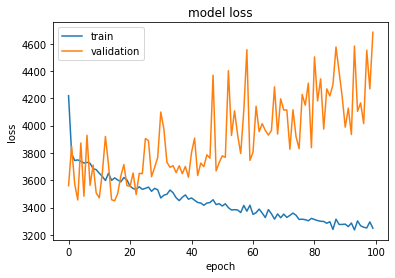

In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
y_nn = model.predict(X_test_lda)
y_nn = ((y_nn+5)//10)*10
y_nn = y_nn.reshape(y_nn.shape[0],)
Counter(y_nn)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('energy_train.csv')
test = pd.read_csv('energy_test.csv')

#removing outliners
#spliting in train and target
train.drop(['date'], axis =1, inplace = True)
test.drop(['date'], axis =1, inplace= True)

In [0]:
train = train.fillna(method = 'ffill')
test = test.fillna(method = 'ffill')

In [23]:
from scipy import stats
train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

,id,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,moisture_4,degree_C5,moisture_5,degree_C6,moisture_6,degree_C7,moisture_7,degree_C8,moisture_8,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
27,28,100,20,21.356667,45.826667,20.666667,45.163333,20.390000,46.090000,19.390000,47.500000,18.600000,62.430000,5.433333,86.326667,17.890,43.790000,19.200000,49.433333,16.890000,44.790000,5.800000,735.600000,87.500000,6.000000,40.0,3.800000,19.119398,19.119398
28,29,100,20,21.390000,45.690000,20.700000,45.060000,20.390000,46.090000,19.426667,47.993333,18.666667,59.030000,5.500000,86.600000,17.890,43.700000,19.230000,49.400000,16.890000,44.700000,5.733333,735.666667,87.666667,6.000000,40.0,3.766667,43.484542,43.484542
29,30,100,20,21.500000,45.333333,20.700000,44.933333,20.390000,46.060000,19.566667,48.466667,18.823333,56.726667,5.590000,86.466667,17.865,43.570000,19.290000,49.326667,16.890000,44.700000,5.666667,735.733333,87.833333,6.000000,40.0,3.733333,17.017450,17.017450
30,31,110,20,21.500000,45.126667,20.790000,44.633333,20.390000,46.000000,19.666667,48.093333,18.963333,55.333333,5.590000,86.325000,17.790,43.400000,19.290000,49.163333,16.823333,44.700000,5.600000,735.800000,88.000000,6.000000,40.0,3.700000,24.104006,24.104006
31,32,400,20,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.600000,47.500000,19.033333,54.093333,5.656667,86.226667,17.790,43.223333,19.356667,49.030000,16.823333,44.700000,5.650000,735.883333,87.833333,6.166667,40.0,3.716667,29.978291,29.978291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,110,0,22.100000,35.760000,19.533333,37.400000,22.390000,34.030000,21.500000,32.578750,20.600000,41.090000,4.656667,30.626667,21.890,29.468571,24.356667,35.760000,20.290000,33.030000,5.100000,757.833333,73.666667,4.666667,40.0,0.700000,3.293259,3.293259
14996,14997,110,10,22.033333,35.626667,19.500000,37.290000,22.426667,34.000000,21.468571,32.471429,20.600000,41.090000,4.560000,31.323333,21.850,29.456000,24.356667,35.700000,20.290000,32.900000,4.900000,757.866667,75.333333,4.333333,40.0,0.800000,32.690584,32.690584
14997,14998,110,0,22.033333,35.466667,19.426667,37.290000,22.426667,34.000000,21.390000,32.290000,20.600000,40.966667,4.226667,32.596667,21.890,29.697143,24.390000,35.663333,20.290000,32.826667,4.700000,757.900000,77.000000,4.000000,40.0,0.900000,46.457592,46.457592
14998,14999,110,0,22.033333,35.400000,19.356667,37.360000,22.390000,33.900000,21.390000,32.277143,20.600000,40.900000,3.833333,34.926667,21.956,30.016000,24.390000,35.663333,20.260000,32.663333,4.500000,757.933333,78.666667,3.666667,40.0,1.000000,43.027440,43.027440


In [0]:
train = train[train['WattHour'] < 400]

target = train['WattHour']
train = train.drop(['WattHour'], axis = 1)

In [25]:
print(train.shape)
print(target.shape)

(14526, 28)
(14526,)


In [27]:
#preproceesing
dataset = pd.concat([train, test], axis = 0, ignore_index = True)
dataset.describe()
dataset.info()


missing_value_col  =['degree_C1', 'degree_C3', 'moisture_9']

for col in missing_value_col:
    dataset[col].fillna(method = 'ffill', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18901 entries, 0 to 18900
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18901 non-null  int64  
 1   luminousity        18901 non-null  int64  
 2   degree_C1          18901 non-null  float64
 3   moisture_1         18901 non-null  float64
 4   degree_C2          18901 non-null  float64
 5   moisture_2         18901 non-null  float64
 6   degree_C3          18901 non-null  float64
 7   moisture_3         18901 non-null  float64
 8   degree_C4          18901 non-null  float64
 9   moisture_4         18901 non-null  float64
 10  degree_C5          18901 non-null  float64
 11  moisture_5         18901 non-null  float64
 12  degree_C6          18901 non-null  float64
 13  moisture_6         18901 non-null  float64
 14  degree_C7          18901 non-null  float64
 15  moisture_7         18901 non-null  float64
 16  degree_C8          189

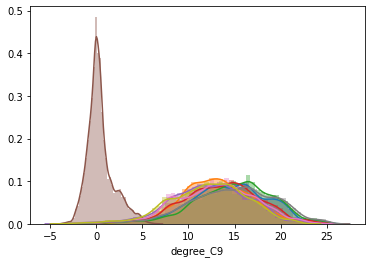

In [28]:

dataset['degree_C1'] = dataset['degree_C1'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C1'])

dataset['degree_C2'] = dataset['degree_C2'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C2'])

dataset['degree_C3'] = dataset['degree_C3'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C3'])

dataset['degree_C4'] = dataset['degree_C4'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C4'])

dataset['degree_C5'] = dataset['degree_C5'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C5'])

dataset['degree_C6'] = dataset['degree_C6'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C6'])

dataset['degree_C7'] = dataset['degree_C7'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C7'])

dataset['degree_C8'] = dataset['degree_C8'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C8'])

dataset['degree_C9'] = dataset['degree_C9'] - dataset['degree_Cout']
sns.distplot(dataset['degree_C9'])


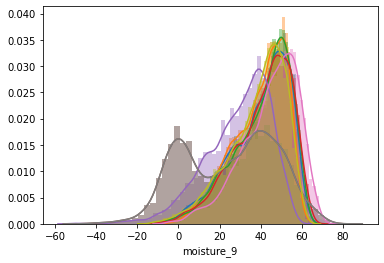

In [29]:

dataset['moisture_1'] =  dataset['moisture_out'] - dataset['moisture_1'] 
sns.distplot(dataset['moisture_1'])

dataset['moisture_2'] =  dataset['moisture_out'] - dataset['moisture_2'] 
sns.distplot(dataset['moisture_2'])

dataset['moisture_3'] =  dataset['moisture_out'] - dataset['moisture_3'] 
sns.distplot(dataset['moisture_3'])

dataset['moisture_4'] =  dataset['moisture_out'] - dataset['moisture_4'] 
sns.distplot(dataset['moisture_4'])

dataset['moisture_5'] =  dataset['moisture_out'] - dataset['moisture_5'] 
sns.distplot(dataset['moisture_5'])

dataset['moisture_6'] =  dataset['moisture_out'] - dataset['moisture_6'] 
sns.distplot(dataset['moisture_6'])

dataset['moisture_7'] =  dataset['moisture_out'] - dataset['moisture_7'] 
sns.distplot(dataset['moisture_7'])

dataset['moisture_8'] =  dataset['moisture_out'] - dataset['moisture_8'] 
sns.distplot(dataset['moisture_6'])

dataset['moisture_9'] =  dataset['moisture_out'] - dataset['moisture_9'] 
sns.distplot(dataset['moisture_9'])

In [0]:
dataset = dataset.drop(['id', 'random_variable_1', 'random_variable_2', 'Clarity', 'dew_index'], axis = 1)

In [0]:
train = dataset.iloc[:14526, :]
test = dataset.iloc[14526:, :]

In [0]:
temp_train = train.loc[:,['degree_C1','degree_C2','degree_C3','degree_C4','degree_C5',
               'degree_C9','degree_C7','degree_C8',]]

temp_test = test.loc[:,['degree_C1','degree_C2','degree_C3','degree_C4','degree_C5',
               'degree_C9','degree_C7','degree_C8',]]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)

temp_train_lda = lda.fit(temp_train, target).transform(temp_train)
temp_test_lda = lda.transform(temp_test)
temp_train_lda = pd.DataFrame(temp_train_lda)
temp_test_lda = pd.DataFrame(temp_test_lda)


lda.explained_variance_ratio_

mois_train = train.loc[:,['moisture_1','moisture_2','moisture_3','moisture_4',
                              'moisture_9','moisture_8','moisture_7','moisture_5',]]

mois_test = test.loc[:,['moisture_1','moisture_2','moisture_3','moisture_4',
                              'moisture_9','moisture_8','moisture_7','moisture_5',]]

mois_train_lda = lda.fit(mois_train, target).transform(mois_train)
mois_test_lda = lda.transform(mois_test)
mois_train_lda = pd.DataFrame(mois_train_lda)
mois_test_lda = pd.DataFrame(mois_test_lda)


In [0]:

col_to_remove = [ 'moisture_out','degree_Cout',
                  'degree_C1','moisture_1','degree_C2','moisture_2','degree_C3','moisture_3',
                  'degree_C8','moisture_8','degree_C4','moisture_4','degree_C5','moisture_5',
                 'degree_C7','moisture_7','degree_C9','moisture_9',]
                  

train = train.drop(col_to_remove, axis =1)
test = test.drop(col_to_remove, axis =1)

train_con = pd.concat([train, temp_train_lda, mois_train_lda], axis =1)
test_con = pd.DataFrame(np.hstack([test, temp_test_lda, mois_test_lda]))

In [36]:
print(test_con.shape)

(4375, 7)


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 5)
train_lda = lda.fit(train_con, target).transform(train_con)
test_lda = lda.transform(test_con)


lda.explained_variance_ratio_

array([0.85114803, 0.09522885, 0.02651463, 0.01599445, 0.00571912])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_nor = sc.fit_transform(train_con)
test_nor = sc.transform(test_con)

In [40]:
train_nor.shape

(14526, 7)

In [43]:
import keras

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint


model = Sequential()

model.add(Dense(32, activation  = 'relu', kernel_initializer = 'uniform', input_shape = (5,)))
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.12))
model.add(Dense(1024, activation = 'relu', kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.18))
model.add(Dense(32, activation = 'relu', kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dense(12, activation = 'relu', kernel_initializer = 'uniform'))

model.add(Dense(1, activation = 'linear'))

model.compile('adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

#model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
callbacks_list = [checkpoint]

history = model.fit(train_lda,target,epochs = 30, batch_size = 32,validation_split = 0.2, callbacks = callbacks_list)


Train on 11620 samples, validate on 2906 samples
Epoch 1/30
11620/11620 [==============================] - 4s 384us/step - loss: 7761.1975 - mean_squared_error: 7761.1934 - val_loss: 4535.5228 - val_mean_squared_error: 4535.5225

Epoch 00001: val_loss improved from inf to 4535.52279, saving model to Weights-001--4535.52279.hdf5
Epoch 2/30
11620/11620 [==============================] - 4s 329us/step - loss: 4139.0070 - mean_squared_error: 4139.0078 - val_loss: 4066.5383 - val_mean_squared_error: 4066.5386

Epoch 00002: val_loss improved from 4535.52279 to 4066.53827, saving model to Weights-002--4066.53827.hdf5
Epoch 3/30
11620/11620 [==============================] - 4s 325us/step - loss: 4064.9005 - mean_squared_error: 4064.8992 - val_loss: 4237.7316 - val_mean_squared_error: 4237.7324

Epoch 00003: val_loss did not improve from 4066.53827
Epoch 4/30
11620/11620 [==============================] - 4s 321us/step - loss: 4026.6798 - mean_squared_error: 4026.6799 - val_loss: 4125.7843 - v

In [0]:
y_nn = model.predict(test_lda)

y_nn = ((y_nn+5)//10) *10
y_nn = y_nn.reshape(y_nn.shape[0],)
Counter(y_nn)

y = pd.DataFrame(y_nn)
y.to_csv('lda_5.csv')